<a href="https://colab.research.google.com/github/chanpaulamol/Image_Processing_Computer_Vision/blob/main/project_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
# Accessing my drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv 
import math 
from google.colab.patches import cv2_imshow
from PIL import Image as im

Average Filter

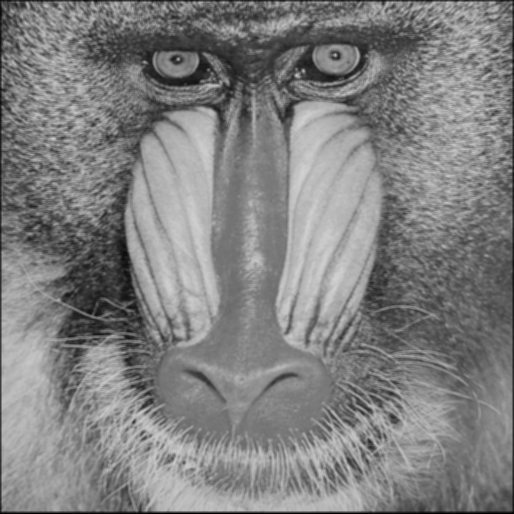

In [15]:
# Load Input Image 
image = cv.imread('/content/drive/MyDrive/PCVK/images/mandrill.tiff')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

height, width, channels = image.shape

# Average filter
kernel_average = np.array([[1,1,1],
                          [1,1,1],
                          [1,1,1]]) / 9.0  # normalize the kernel for average filter

# Set padding and stride values
padding = 2
stride = 1

# Define convolution function
def convolution(gray_image, kernel, stride, padding):
  # Compute output dimensions
  out_height = (height + 2*padding - kernel.shape[0]) // stride + 1
  out_width = (width + 2*padding - kernel.shape[1]) // stride + 1

  # Initialize output image
  imageResult = np.zeros((out_height, out_width))

  # Pad input image
  padded_image = np.zeros((height + 2*padding, width + 2*padding), dtype=np.uint8)
  for i in range(height):
    for j in range(width):
      padded_image[i+padding, j+padding] = gray_image[i,j]

  # Perform convolution
  for i in range(out_height):
    for j in range(out_width):
      for k in range(kernel.shape[0]):
        for l in range(kernel.shape[1]):
          # Compute input indices
          x = i*stride + k - padding
          y = j*stride + l - padding

          # Check if input indices are within bounds
          if x >= 0 and x < height and y >= 0 and y < width:
            imageResult[i, j] += kernel[k, l] * padded_image[x + padding, y + padding]

  return imageResult

# Apply convolution and display resulting image
result = convolution(gray_image, kernel_average, stride=1, padding=2)
cv2_imshow(result)


Mode Filter

<ipython-input-11-f36c6a551865>:40: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  output_value = mode(input_patch.flatten())[0]


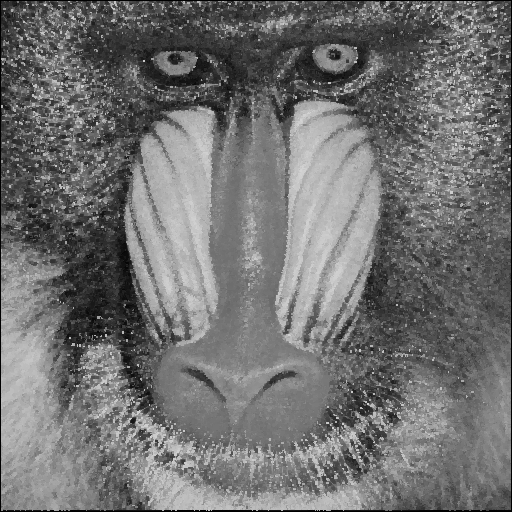

In [11]:
from scipy.stats import mode

# Load Input Image 
input_image = cv.imread('/content/drive/MyDrive/PCVK/images/mandrill.tiff')
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

height, width, channels = input_image.shape

# Mode filter
kernel_size = 3

# Set padding and stride values
padding_size = 1
stride_size = 1

# Define convolution function
def convolution(image, kernel, stride, padding):
  # Compute output dimensions
  output_height = (height + 2*padding - kernel.shape[0]) // stride + 1
  output_width = (width + 2*padding - kernel.shape[1]) // stride + 1

  # Initialize output image
  output_image = np.zeros((output_height, output_width))

  # Pad input image
  padded_image = np.zeros((height + 2*padding, width + 2*padding), dtype=np.uint8)
  for i in range(height):
    for j in range(width):
      padded_image[i+padding, j+padding] = image[i,j]

  # Perform convolution
  for i in range(output_height):
    for j in range(output_width):
      # Compute input indices
      x = i*stride
      y = j*stride
      input_patch = padded_image[x:x+kernel.shape[0], y:y+kernel.shape[1]]

      # Compute output value
      output_value = mode(input_patch.flatten())[0]

      # Set output value
      output_image[i, j] = output_value

  return output_image

# Apply convolution and display resulting image
kernel_mode = np.ones((kernel_size, kernel_size), dtype=np.uint8)
result_image = convolution(gray_image, kernel_mode, stride=stride_size, padding=padding_size)
cv2_imshow(result_image)


Median Filter

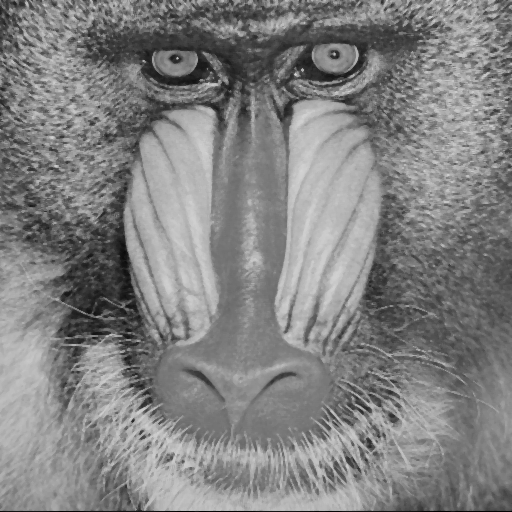

In [12]:
# Load Input Image 
input_image = cv.imread('/content/drive/MyDrive/PCVK/images/mandrill.tiff')
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

# Median filter
kernel_size = 3

# Apply median filter using cv.medianBlur
result_image = cv.medianBlur(gray_image, kernel_size)

# Display resulting image
cv2_imshow(result_image)


Loss Pass Filter

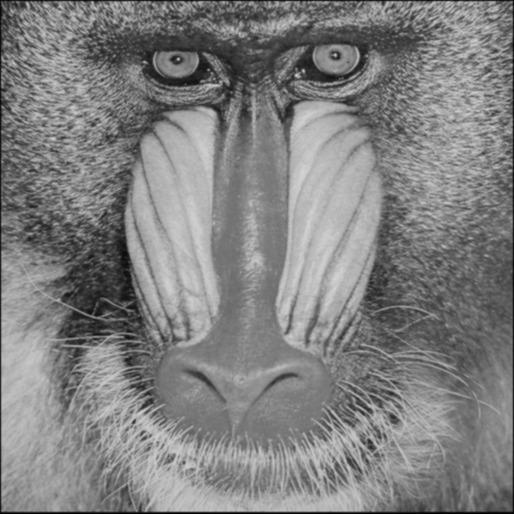

In [13]:
# Load Input Image 
image = cv.imread('/content/drive/MyDrive/PCVK/images/mandrill.tiff')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

height, width, channels = image.shape

# Low Pass Filter Kernel
low_pass_kernel = np.array([[1, 1, 1],
                            [1, 4, 1],
                            [1, 1, 1]]) / 12.0  # normalize the kernel

# Set padding and stride values
padding = 2
stride = 1

# Define convolution function
def convolution(gray_image, kernel, stride, padding):
  # Compute output dimensions
  out_height = (height + 2*padding - kernel.shape[0]) // stride + 1
  out_width = (width + 2*padding - kernel.shape[1]) // stride + 1

  # Initialize output image
  imageResult = np.zeros((out_height, out_width))

  # Pad input image
  padded_image = np.zeros((height + 2*padding, width + 2*padding), dtype=np.uint8)
  for i in range(height):
    for j in range(width):
      padded_image[i+padding, j+padding] = gray_image[i,j]

  # Perform convolution
  for i in range(out_height):
    for j in range(out_width):
      for k in range(kernel.shape[0]):
        for l in range(kernel.shape[1]):
          # Compute input indices
          x = i*stride + k - padding
          y = j*stride + l - padding

          # Check if input indices are within bounds
          if x >= 0 and x < height and y >= 0 and y < width:
            imageResult[i, j] += kernel[k, l] * padded_image[x + padding, y + padding]

  return imageResult

# Apply convolution and display resulting image
result = convolution(gray_image, low_pass_kernel, stride=1, padding=2)
cv2_imshow(result)


High Pass Filter

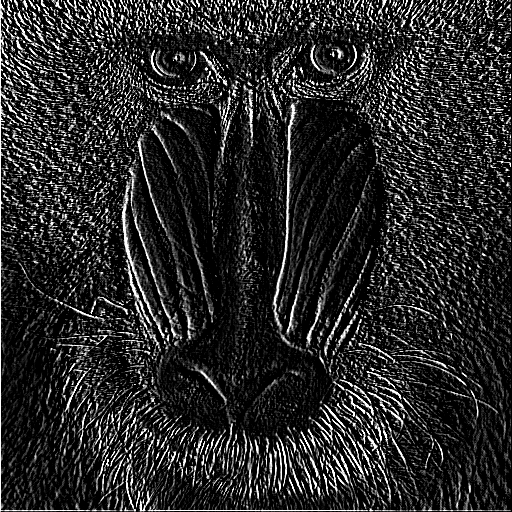

In [14]:
# Load Input Image 
image = cv.imread('/content/drive/MyDrive/PCVK/images/mandrill.tiff')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

height, width = gray_image.shape

# High pass filter
high_pass_kernel = np.array([[-1, 0, 1],
                             [-1, 0, 3],
                             [-3, 0, 1]])

# Set padding and stride values
padding = 1
stride = 1

# Define convolution function
def convolution(gray_image, kernel, stride, padding):
    # Compute output dimensions
    out_height = (height + 2*padding - kernel.shape[0]) // stride + 1
    out_width = (width + 2*padding - kernel.shape[1]) // stride + 1

    # Initialize output image
    imageResult = np.zeros((out_height, out_width))

    # Pad input image
    padded_image = np.zeros((height + 2*padding, width + 2*padding), dtype=np.uint8)
    padded_image[padding:-padding, padding:-padding] = gray_image

    # Perform convolution
    for i in range(out_height):
        for j in range(out_width):
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    # Compute input indices
                    x = i*stride + k - padding
                    y = j*stride + l - padding

                    # Check if input indices are within bounds
                    if x >= 0 and x < height and y >= 0 and y < width:
                        imageResult[i, j] += kernel[k, l] * padded_image[x + padding, y + padding]

    return imageResult

# Apply convolution and display resulting image
result = convolution(gray_image, high_pass_kernel, stride=1, padding=1)
cv2_imshow(result)
